# Analyzing the unemployment rate in India!!

## Problem:
Due to the sharp increase in the unemplyment during covid-19, this project aims to analyze and detect the unemplyment rate in India.

## Data:
The dataset can be found on Kaggle 
https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india/code

## Model building:
Since this is a regression problem, we will be using Random Forest Refgressor as the baseline model.

## Evaluation metrics :
we will be using different regression evaluation metrics like RMSE(root mean squared error), MSE(mean squared error), MAE(mean asbolute error), R2 error(R squared error), MAPE (mean absolute percentage error).

## Preparing the tools

In [62]:
#import all the EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#modelling libraries 
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [63]:
#load the data 
df = pd.read_csv("C:\\Users\\aryas\\OneDrive\\Documents\\unemployement rate in india.csv")

In [64]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [66]:
#summary statistics
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [67]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [68]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Print the cleaned column names
print(df.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [69]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [70]:
df.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

In [71]:
#check for missing values
print(df.isna().sum())

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64


In [72]:
#fill the categorical values with the mode
cat_columns = ["Region","Date","Frequency","Area"]
for columns in cat_columns:
    df[columns]= df[columns].fillna(df[columns].mode()[0])
    

In [73]:
df.isna().sum()

Region                                      0
Date                                        0
Frequency                                   0
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                        0
dtype: int64

In [74]:
#fill the numerical columns with the median
num_columns = ["Estimated Unemployment Rate (%)","Estimated Employed", "Estimated Labour Participation Rate (%)"]
for value in num_columns:
    df[value] = df[value].fillna(df[value].median())

In [75]:
#now check for missing values
df.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [76]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [77]:
df.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

In [78]:
# Adding Day, Month, and Year
df['Date'] = pd.to_datetime(df['Date'])

In [79]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


### EDA (Exploratory Data Analysis)

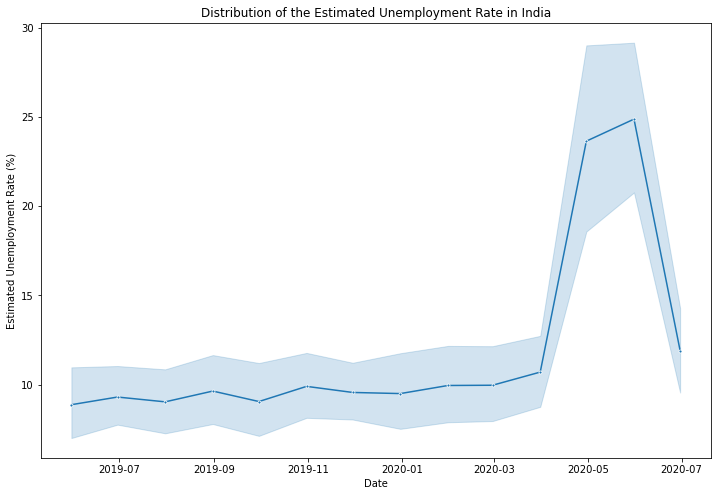

In [80]:
#visualizing the estimated unemployment rate over time
plt.figure(figsize = (12,8))
sns.lineplot(x= df["Date"], y=df["Estimated Unemployment Rate (%)"], data=df, marker=".")
plt.title("Distribution of the Estimated Unemployment Rate in India")
plt.show()

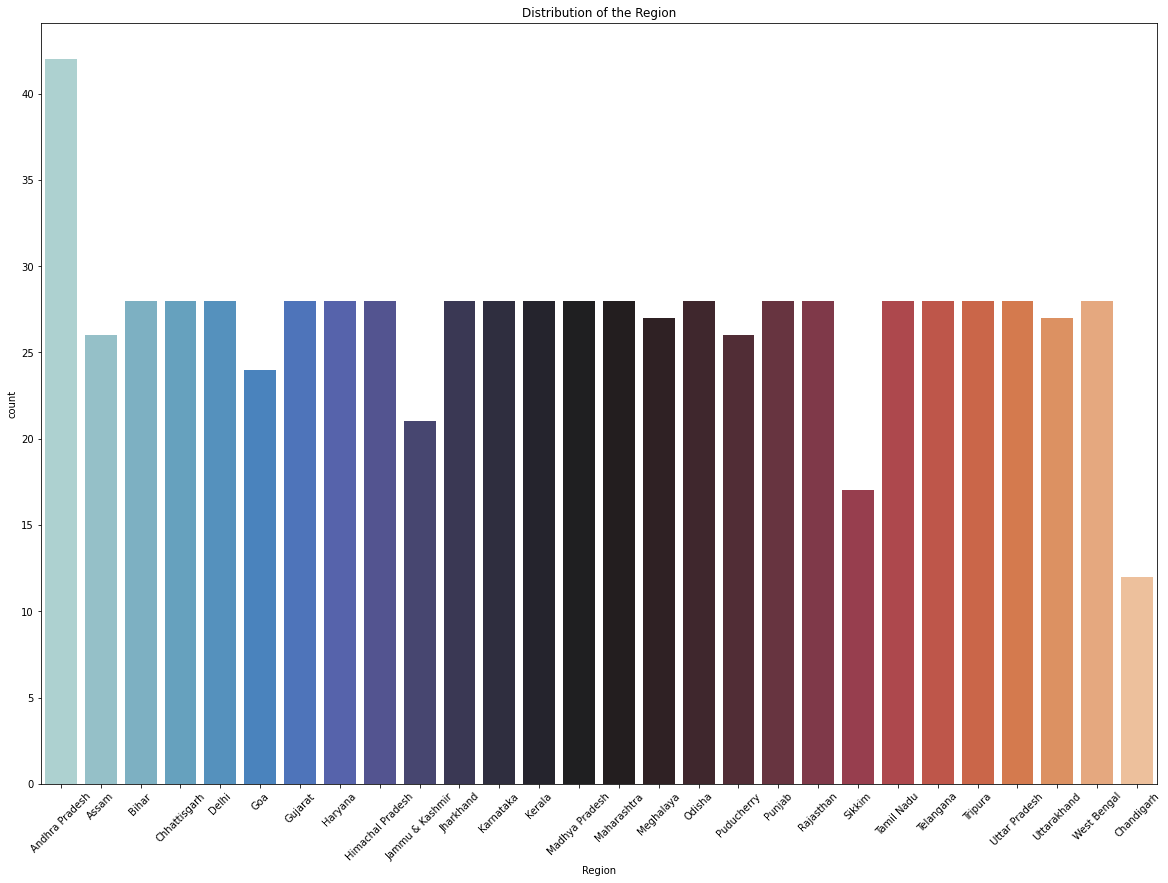

In [81]:
#distribution of the region
plt.figure(figsize = (20,14))
sns.countplot(x= df["Region"], data =df, palette="icefire")
plt.title("Distribution of the Region")
plt.xticks(rotation = 45)
plt.show()

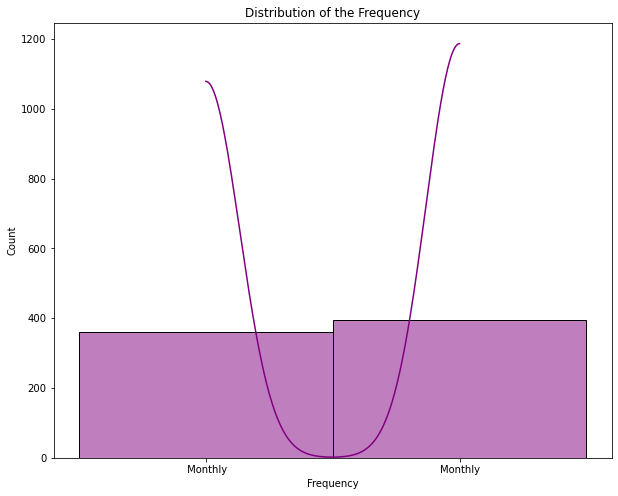

In [82]:
#distribution of frequency
plt.figure(figsize = (10,8))
sns.histplot(df["Frequency"], bins=20, kde=True, color=["purple"])
plt.title("Distribution of the Frequency")
plt.show()

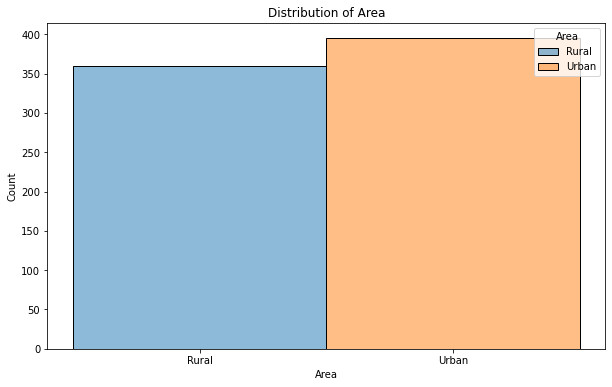

In [83]:
#distribution of the Area
plt.figure(figsize = (10,6))
sns.histplot(data=df, x=df["Area"], hue="Area")
plt.title("Distribution of Area")
plt.show()

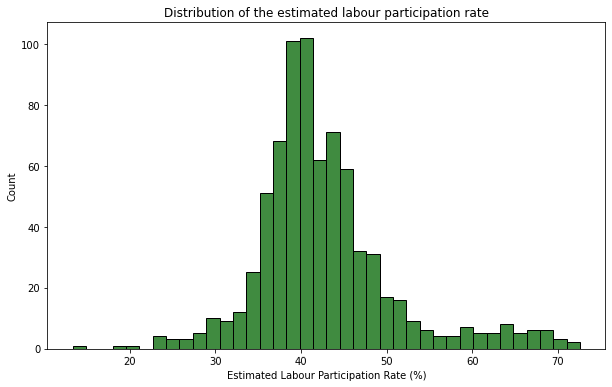

In [84]:
#distribution of Estimated labour participatione
plt.figure(figsize = (10,6))
sns.histplot(x=df["Estimated Labour Participation Rate (%)"], color =["darkgreen"])
plt.xticks(rotation = 1)
plt.title("Distribution of the estimated labour participation rate")
plt.show()

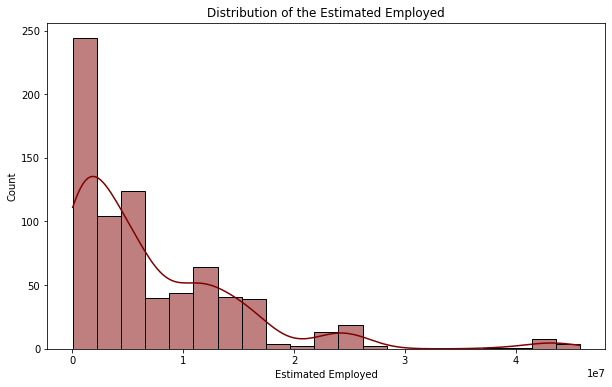

In [85]:
#distribution of the estimated employed
plt.figure(figsize = (10,6))
sns.histplot(df["Estimated Employed"], color = "maroon", kde=True)
plt.title("Distribution of the Estimated Employed")
plt.show()

In [86]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


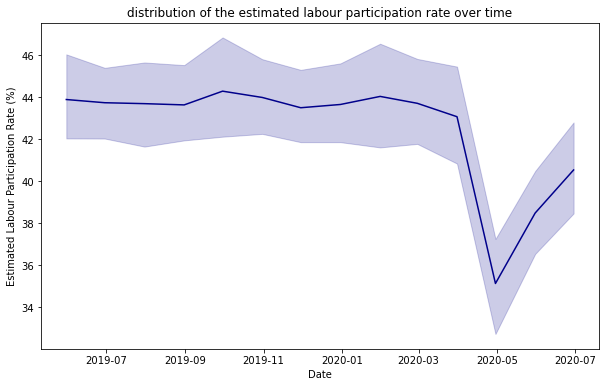

In [87]:
#distribution of the estimated labour participation rate over time
plt.figure(figsize = (10,6))
sns.lineplot(x=df["Date"], y=df["Estimated Labour Participation Rate (%)"], color ="darkblue");
plt.title("distribution of the estimated labour participation rate over time");

In [88]:
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

In [89]:
#convert all the non numeric columns to numeric ones
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ["Region","Frequency","Area"]
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,0,2019-05-31,0,3.65,11999139.0,43.24,0
1,0,2019-06-30,0,3.05,11755881.0,42.05,0
2,0,2019-07-31,0,3.75,12086707.0,43.50,0
3,0,2019-08-31,0,3.32,12285693.0,43.97,0
4,0,2019-09-30,0,5.17,12256762.0,44.68,0
...,...,...,...,...,...,...,...
749,27,2020-02-29,1,7.55,10871168.0,44.09,1
750,27,2020-03-31,1,6.67,10806105.0,43.34,1
751,27,2020-04-30,1,15.63,9299466.0,41.20,1
752,27,2020-05-31,1,15.22,9240903.0,40.67,1


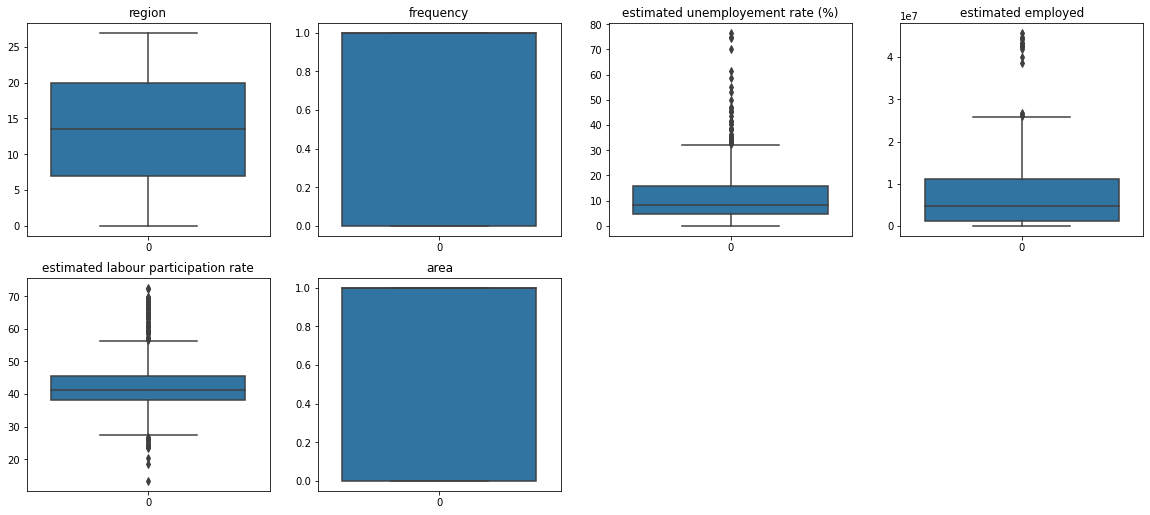

In [90]:
#check for outliers
plt.figure(figsize = (20,18))

plt.subplot(4,4,1)
sns.boxplot(data =df['Region'])
plt.title("region")

plt.subplot(4,4,2)
sns.boxplot(data = df["Frequency"])
plt.title("frequency")

plt.subplot(4,4,3)
sns.boxplot(data = df["Estimated Unemployment Rate (%)"])
plt.title("estimated unemployement rate (%)")

plt.subplot(4,4,4)
sns.boxplot(data = df["Estimated Employed"])
plt.title("estimated employed")

plt.subplot(4,4,5)
sns.boxplot(data = df["Estimated Labour Participation Rate (%)"])
plt.title("estimated labour participation rate")

plt.subplot(4,4,6)
sns.boxplot(data = df["Area"])
plt.title("area");

In [95]:
#set date as the index column
df.set_index('Date', inplace=True)

### It is observed that columns like "estimated unemployement rate (%)", "estimated employed" and "estimated labour participation rate" have some outliers present. 
We will now treat these outliers with IQR (inter quartile range)

In [96]:
df["Estimated Unemployment Rate (%)"] = df["Estimated Unemployment Rate (%)"].clip(lower = df["Estimated Unemployment Rate (%)"].quantile(0.05),upper = df["Estimated Unemployment Rate (%)"].quantile(0.95))

df["Estimated Labour Participation Rate (%)"] = df["Estimated Labour Participation Rate (%)"].clip(lower = df["Estimated Labour Participation Rate (%)"].quantile(0.07),upper = df["Estimated Labour Participation Rate (%)"].quantile(0.93))

df["Estimated Employed"] = df["Estimated Employed"].clip(lower=df["Estimated Employed"].quantile(0.07), upper=df["Estimated Employed"].quantile(0.93))

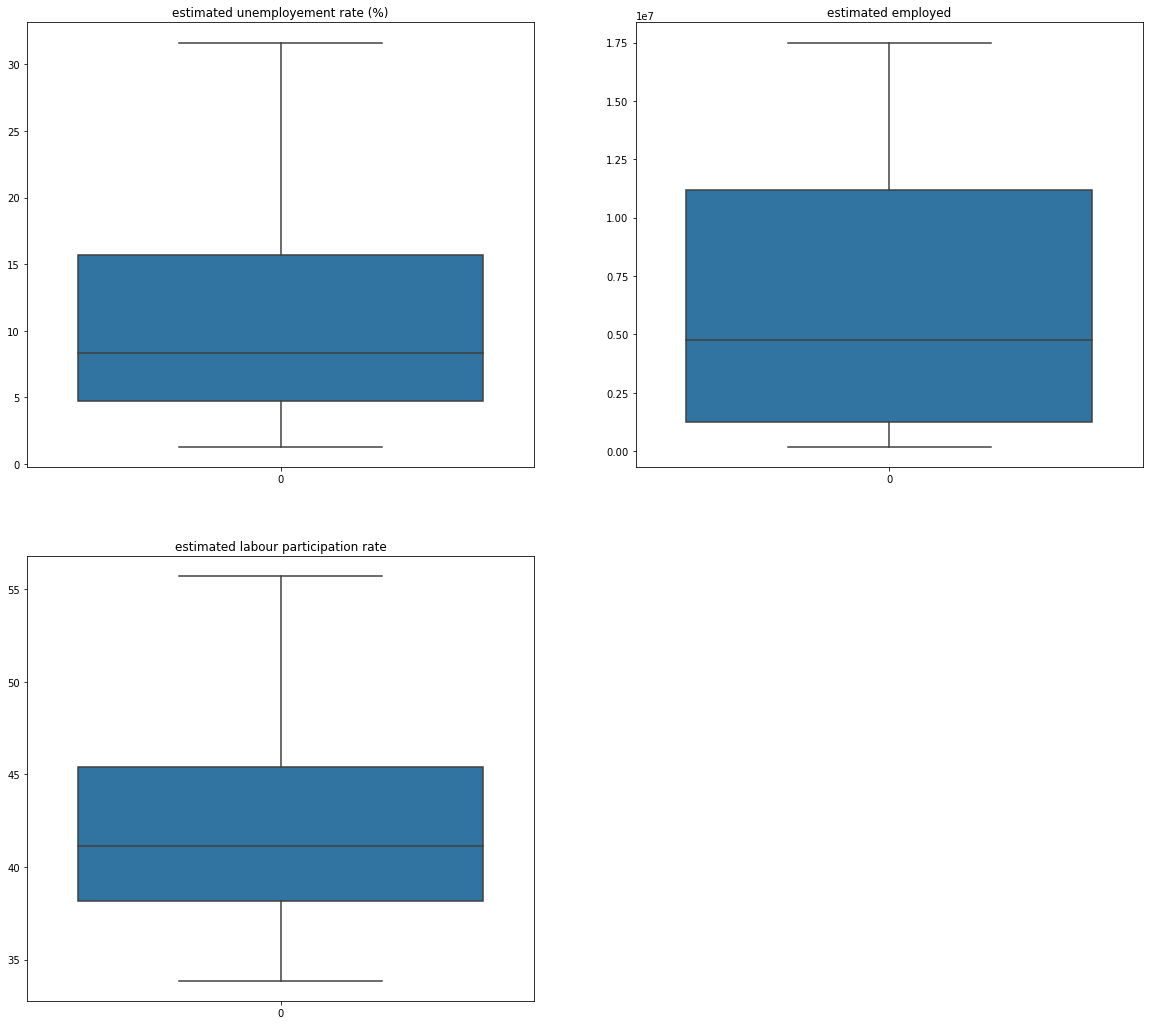

In [97]:
plt.figure(figsize = (20,18))

plt.subplot(2,2,1)
sns.boxplot(data = df["Estimated Unemployment Rate (%)"])
plt.title("estimated unemployement rate (%)")

plt.subplot(2,2,2)
sns.boxplot(data = df["Estimated Employed"])
plt.title("estimated employed")

plt.subplot(2,2,3)
sns.boxplot(data = df["Estimated Labour Participation Rate (%)"])
plt.title("estimated labour participation rate");

### The outliers have been removed now.

## Modelling

In [98]:
#split the data into x and y features
x = df.drop(["Estimated Unemployment Rate (%)"], axis =1)
y = df["Estimated Unemployment Rate (%)"]

#split the data into train and test splits now
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
len(x_train),len(x_test), len(y_train), len(y_test)

(603, 151, 603, 151)

### 1. Random Forest Regressor model

In [99]:
#instantiate the model
model = RandomForestRegressor(random_state=42, n_estimators = 100)

#fit the model to the train data
model.fit(x_train,y_train)
#score it on the test data
model.score(x_test,y_test)

0.5456746310941875

### We are getting a score of 54% around, it can be improved with hyperparameter tuning..

In [102]:
#predictions
y_preds = model.predict(x_test)
#evaluations 
mae = mean_absolute_error(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)
mape = mean_absolute_percentage_error(y_test,y_preds)
rmse = np.sqrt(mse)

In [103]:
print("Random forest regression metrics:")
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("Absolute Percentage Error:",mape)

Random forest regression metrics:
Mean Absolute Error: 3.045478256622518
Mean Squared Error: 27.14059354287554
Root Mean Squared Error: 5.209663476931647
Absolute Percentage Error: 0.45772580419225456


### Hyperparameter tuning - let's tune our model further and try to improve it's score.

In [104]:
param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [None, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required at each leaf node
}


In [105]:
from sklearn.model_selection import GridSearchCV

# Define the Random Forest Regressor
rf = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)  # X_train and y_train are your training data

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [106]:
#now let's create an ideal model using these paramters and check for improvement
ideal_model = RandomForestRegressor(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators =200)

#fit it to the train data
ideal_model.fit(x_train,y_train)
#score on the test data
ideal_model.score(x_test,y_test)

0.5524793262098757

In [107]:
#prediction
ideal_preds = ideal_model.predict(x_test)
mae_1 = mean_absolute_error(y_test,ideal_preds)
mse_1 = mean_squared_error(y_test,ideal_preds)
mape_1 = mean_absolute_percentage_error(y_test,ideal_preds)
rmse_1 = np.sqrt(mse_1)

In [108]:
print("Random forest regression metrics:")
print("Mean Absolute Error:",mae_1)
print("Mean Squared Error:",mse_1)
print("Root Mean Squared Error:",rmse_1)
print("Absolute Percentage Error:",mape_1)

Random forest regression metrics:
Mean Absolute Error: 3.0693784555804187
Mean Squared Error: 26.73409309857309
Root Mean Squared Error: 5.170502209512446
Absolute Percentage Error: 0.4797107689121616


### Observations :
1.Mean Absolute Error (MAE): The MAE measures the average absolute difference between the predicted and actual values. After hyperparameter tuning, the MAE decreased slightly, indicating that, on average, the model's predictions are closer to the actual values.

2.Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted and actual values. Similar to MAE, the MSE decreased after hyperparameter tuning, indicating a reduction in prediction errors.

3.Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE and provides a measure of the spread of prediction errors. The decrease in RMSE after hyperparameter tuning suggests improved model accuracy.

4.Absolute Percentage Error (APE): The APE measures the percentage difference between the predicted and actual values. After hyperparameter tuning, the APE increased slightly, indicating that the model's predictions are, on average, slightly further away from the actual values in percentage terms.


### The r2 score also has slightly improved,indicating that the model's ability to explain the variance in the target variable improved.